#Building enviroment

##Setting GPU as hardware accelerator

In [1]:
!nvidia-smi

Tue Jan  7 02:11:23 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

##Installing dependecies

In [2]:
!pip install tokenizers==0.21

!pip install -q gdown inference-gpu supervision
!pip install -q git+https://github.com/roboflow/sports.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.6/907.6 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 51.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.2 MB/s 

In [3]:
!mkdir content
!mkdir results

In [4]:
!gdown -O "content/0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
!gdown -O "content/2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
!gdown -O "content/08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
!gdown -O "content/573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "content/121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: /content/content/0bfacc_0.mp4
100% 19.9M/19.9M [00:00<00:00, 105MB/s] 
Downloading...
From: https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf
To: /content/content/2e57b9_0.mp4
100% 21.1M/21.1M [00:00<00:00, 49.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-
To: /content/content/08fd33_0.mp4
100% 19.9M/19.9M [00:00<00:00, 36.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU
To: /content/content/573e61_0.mp4
100% 18.9M/18.9M [00:00<00:00, 180MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 95.0MB/s]


In [5]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

# Testing system

## Ball, players, goalkeepers and referees detection

In [6]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW')
PLAYER_DETECTION_MODEL = get_model(model_id="football-players-detection-6domv/1", api_key=ROBOFLOW_API_KEY)

Creating function to process each frame

In [17]:
from tqdm import tqdm
import supervision as sv

SOURCE_VIDEO_PATH = "content/0bfacc_0.mp4"
TARGET_VIDEO_PATH = "results/0bfacc_0_result.mp4"

BALL_ID = 0

ellipse_annotator = sv.EllipseAnnotator(
    color = sv.ColorPalette.from_hex(["#00BFFF","#FF1493",'#FFD700']),
    thickness = 2
)
label_annotator = sv.LabelAnnotator(
    color = sv.ColorPalette.from_hex(["#00BFFF","#FF1493",'#FFD700']),
    text_color=sv.Color.from_hex("#000000"),
    text_position=sv.Position.BOTTOM_CENTER
)

triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex("#FFD700"),
    base = 20, height = 17
)

tracker = sv.ByteTrack()
tracker.reset()

video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
video_sink = sv.VideoSink(TARGET_VIDEO_PATH, video_info=video_info)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)

def process_frame(frame):
  result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
  detections = sv.Detections.from_inference(result)

  ball_detections = detections[detections.class_id == BALL_ID]
  ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy,px=10)
  all_detections = detections[detections.class_id != BALL_ID]
  all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
  all_detections.class_id = all_detections.class_id - 1
  all_detections = tracker.update_with_detections(detections=all_detections)

  labels = [
      f"#{tracker_id}"
      for tracker_id in
      all_detections.tracker_id
  ]

  annotated_frame = frame.copy()
  annotated_frame = ellipse_annotator.annotate(scene=annotated_frame, detections=all_detections)
  annotated_frame = triangle_annotator.annotate(scene=annotated_frame, detections=ball_detections)
  annotated_frame = label_annotator.annotate(annotated_frame,all_detections,labels=labels)

  return annotated_frame

Testing by frame to adjust the parameters

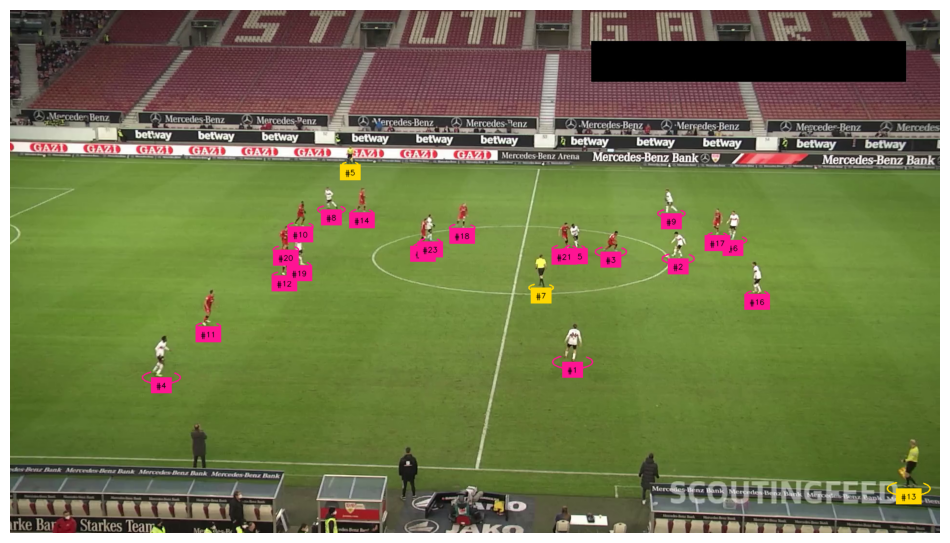

In [18]:
from tqdm import tqdm
import supervision as sv

frame = next(frame_generator)

annotated_frame = process_frame(frame)
sv.plot_image(annotated_frame)

Evaluating system in video

In [9]:
with video_sink:
  for frame in tqdm(frame_generator,total=video_info.total_frames):
    video_sink.write_frame(process_frame(frame))

100%|█████████▉| 749/750 [03:38<00:00,  3.42it/s]
